In [1]:
import numpy as np 
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
URLens = 'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV8yMDE3MDkwNF8xODAwLmdyaWIy/entry.das'
ds = xr.open_dataset(URLens)

In [3]:
URLder = 'https://weather.rsmas.miami.edu/repository/opendap/synth%3A88c07b73-cf8d-4426-9254-16c8e75c2811%3AL0dFRlNfR2xvYmFsXzFwMGRlZ19FbnNlbWJsZV9kZXJpdmVkXzIwMTcwOTA0XzE4MDAuZ3JpYjI%3D/entry.das'
ds_der = xr.open_dataset(URLder)

In [4]:
ds_der = xr.open_dataset(URLder)
ds_der

<xarray.Dataset>
Dimensions:                                                                         (lat: 181, lon: 360, time: 64, time_bounds_1: 2, time1: 2, time2: 65, pressure_difference_layer: 1, pressure_difference_layer_bounds_1: 2, isobaric: 1, height_above_ground: 1, isobaric1: 12, depth_below_surface_layer: 1, depth_below_surface_layer_bounds_1: 2, height_above_ground1: 1, isobaric2: 10)
Coordinates: (12/13)
  * lat                                                                             (lat) float32 ...
  * lon                                                                             (lon) float32 ...
    reftime                                                                         datetime64[ns] ...
  * time                                                                            (time) datetime64[ns] ...
  * time1                                                                           (time1) datetime64[ns] ...
  * time2                                                                           (time2) datetime64[ns] ...
    ...                                                                              ...
  * isobaric                                                                        (isobaric) float32 ...
  * height_above_ground                                                             (height_above_ground) float32 ...
  * isobaric1                                                                       (isobaric1) float32 ...
  * depth_below_surface_layer                                                       (depth_below_surface_layer) float32 ...
  * height_above_ground1                                                            (height_above_ground1) float32 ...
  * isobaric2                                                                       (isobaric2) float32 ...
Dimensions without coordinates: time_bounds_1, pressure_difference_layer_bounds_1, depth_below_surface_layer_bounds_1
Data variables: (12/74)
    LatLon_Projection                                                               int32 ...
    time_bounds                                                                     (time, time_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                                (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    depth_below_surface_layer_bounds                                                (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 ...
    Convective_available_potential_energy_pressure_difference_layer_stdDev          (time2, pressure_difference_layer, lat, lon) float32 ...
    Convective_available_potential_energy_pressure_difference_layer_unweightedMean  (time2, pressure_difference_layer, lat, lon) float32 ...
    ...                                                                              ...
    u-component_of_wind_isobaric_stdDev                                             (time2, isobaric1, lat, lon) float32 ...
    u-component_of_wind_height_above_ground_stdDev                                  (time2, height_above_ground1, lat, lon) float32 ...
    v-component_of_wind_isobaric_unweightedMean                                     (time2, isobaric1, lat, lon) float32 ...
    v-component_of_wind_height_above_ground_unweightedMean                          (time2, height_above_ground1, lat, lon) float32 ...
    v-component_of_wind_isobaric_stdDev                                             (time2, isobaric1, lat, lon) float32 ...
    v-component_of_wind_height_above_ground_stdDev                                  (time2, height_above_ground1, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                             

In [5]:
ds

<xarray.Dataset>
Dimensions:                                                              (lat: 181, lon: 360, time: 64, time_bounds_1: 2, time1: 2, time2: 65, pressure_difference_layer: 1, pressure_difference_layer_bounds_1: 2, isobaric: 1, height_above_ground: 1, isobaric1: 12, depth_below_surface_layer: 1, depth_below_surface_layer_bounds_1: 2, height_above_ground1: 1, isobaric2: 10, ens: 21)
Coordinates: (12/14)
  * lat                                                                  (lat) float32 ...
  * lon                                                                  (lon) float32 ...
    reftime                                                              datetime64[ns] ...
  * time                                                                 (time) datetime64[ns] ...
  * time1                                                                (time1) datetime64[ns] ...
  * time2                                                                (time2) datetime64[ns] ...
    ...                                                                   ...
  * height_above_ground                                                  (height_above_ground) float32 ...
  * isobaric1                                                            (isobaric1) float32 ...
  * depth_below_surface_layer                                            (depth_below_surface_layer) float32 ...
  * height_above_ground1                                                 (height_above_ground1) float32 ...
  * isobaric2                                                            (isobaric2) float32 ...
  * ens                                                                  (ens) int32 ...
Dimensions without coordinates: time_bounds_1, pressure_difference_layer_bounds_1, depth_below_surface_layer_bounds_1
Data variables: (12/39)
    LatLon_Projection                                                    int32 ...
    time_bounds                                                          (time, time_bounds_1) datetime64[ns] ...
    pressure_difference_layer_bounds                                     (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    depth_below_surface_layer_bounds                                     (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 ...
    Convective_available_potential_energy_pressure_difference_layer_ens  (time2, ens, pressure_difference_layer, lat, lon) float32 ...
    Convective_inhibition_pressure_difference_layer_ens                  (time2, ens, pressure_difference_layer, lat, lon) float32 ...
    ...                                                                   ...
    Vertical_velocity_pressure_isobaric_ens                              (time2, ens, isobaric, lat, lon) float32 ...
    Water_equivalent_of_accumulated_snow_depth_surface_ens               (time2, ens, lat, lon) float32 ...
    u-component_of_wind_isobaric_ens                                     (time2, ens, isobaric1, lat, lon) float32 ...
    u-component_of_wind_height_above_ground_ens                          (time2, ens, height_above_ground1, lat, lon) float32 ...
    v-component_of_wind_isobaric_ens                                     (time2, ens, isobaric1, lat, lon) float32 ...
    v-component_of_wind_height_above_ground_ens                          (time2, ens, height_above_ground1, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    file_format:                                                             ...
    Conventions:                                                             ...
    history:                  

In [7]:
# Region, landfall time

roi = ds.sel(lon=slice(360-90,360-40), lat=slice(35,15)) 
landfall = roi.sel(time2='2017-09-11 00:00:00')

min, max:  946.84875 974.057421875  hPa


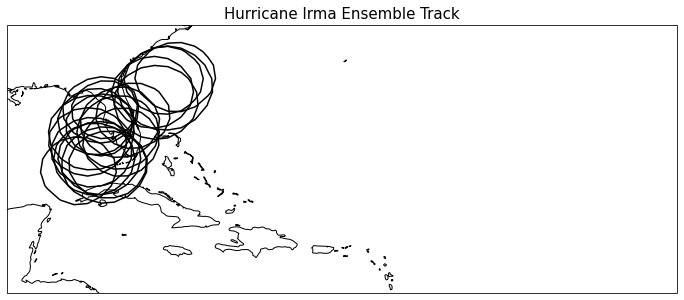

In [8]:
SLPmins = []
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,10])

for iens in range(21):
    SLP = landfall.Pressure_reduced_to_MSL_msl_ens[iens]
    contours = SLP.plot.contour(ax=ax,colors='k', vmin=99000,vmax=99000,levels=1)
    #print('min value: ', SLP.min().values/100.)
    SLPmins.append(SLP.min().values/100.) 

ax.coastlines();
plt.title('Hurricane Irma Ensemble Track',fontsize=15)
print('min, max: ', min(SLPmins), max(SLPmins), ' hPa')

In [9]:
# Track the INDEX LOCATIONS of SLP minima within the ROI. 
# if you want more sophisticated tracking, https://github.com/ecjoliver/stormTracking

argmins = roi.Pressure_reduced_to_MSL_msl_ens.argmin(dim=['lat','lon'])

In [10]:
tracklons = roi.lon[argmins['lon'] ]
tracklats = roi.lat[argmins['lat']]
tracklats

<xarray.DataArray 'lat' (time2: 65, ens: 21)>
array([[17., 17., 17., ..., 17., 17., 17.],
       [17., 17., 17., ..., 17., 17., 16.],
       [17., 17., 16., ..., 17., 17., 16.],
       ...,
       [18., 26., 23., ..., 35., 18., 35.],
       [18., 28., 23., ..., 35., 18., 35.],
       [19., 29., 24., ..., 34., 18., 35.]])
Coordinates:
    lat      (time2, ens) float64 17.0 17.0 17.0 17.0 ... 18.0 34.0 18.0 35.0
    reftime  datetime64[ns] 2017-09-04T18:00:00
  * time2    (time2) datetime64[ns] 2017-09-04T18:00:00 ... 2017-09-20T18:00:00
  * ens      (ens) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Attributes:
    units:    degrees_north

Text(0.5, 1.0, 'Ensemble Member tracks: 18-hour rolling mean of argmin(SLP)')

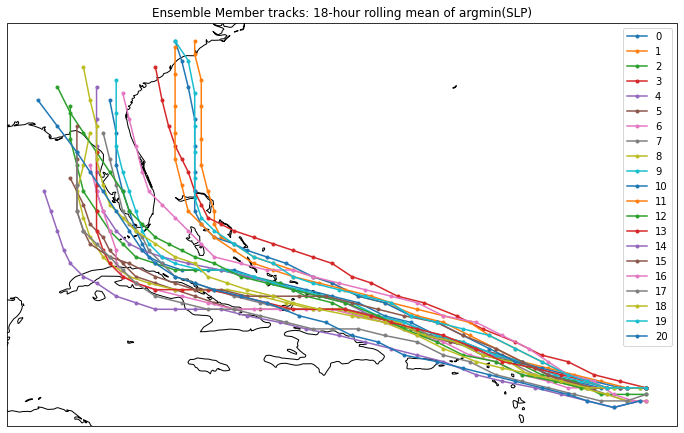

In [12]:
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,10])

ax.coastlines();

for iens in range(21):
    plt.plot(tracklons.sel(ens=iens, time2=slice('2017-09-04','2017-09-12 00:00:00')).rolling({"time2":3}).mean()-360., \
             tracklats.sel(ens=iens, time2=slice('2017-09-04','2017-09-12 00:00:00')).rolling({"time2":3}).mean(), marker='.', label=iens )

ax.legend()
plt.title('Ensemble Member tracks: 18-hour rolling mean of argmin(SLP)')

In [13]:
from eofs.xarray import Eof

In [14]:
solver = Eof( landfall.Pressure_reduced_to_MSL_msl_ens.rename({'ens':'time'}) )
pc = solver.pcs(npcs=1).rename({'time':'ens'})
eof = solver.eofs(neofs=1)

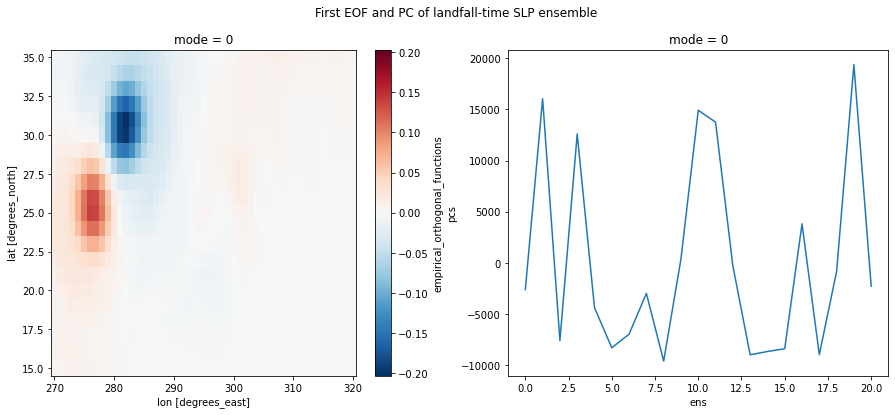

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
fig.suptitle('First EOF and PC of landfall-time SLP ensemble')
eof.plot(ax=axes[0])
pc.plot(ax=axes[1])

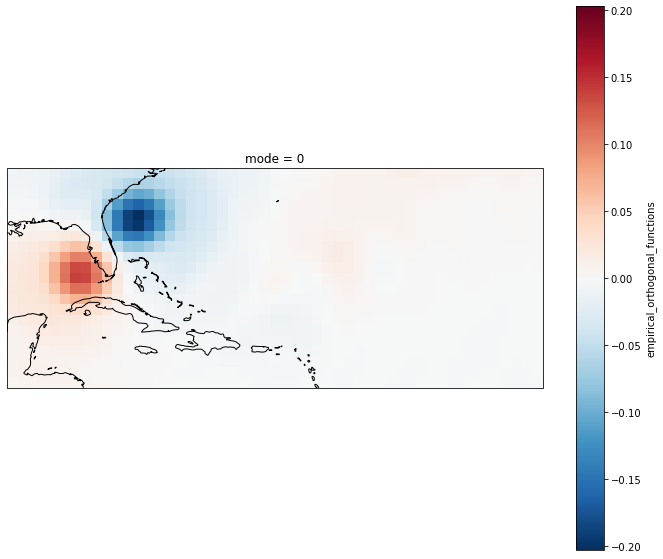

In [19]:
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,10])
eof.plot(ax=ax);
ax.coastlines();

In [24]:
# Correlation of SLP AT ALL TIMES IN BIG REGION with LANDFALL TIME outcome measures. 

bigroi = ds.sel(lon=slice(360-100,360-30), lat=slice(50,10)) 

# TRACK:
# use the measure of NE-SW displacement: EOF1 Mode amplitude. Rename "time" to "ens" (Eofs package demanded it)
pccor = xr.corr(pc[:,0], bigroi['Pressure_reduced_to_MSL_msl_ens'], dim="ens")

# STRENGTH: 
# use with strength measure: SLPmins. Have to make it a xarray DataArray with dimesnion called "ens" 
xSLPmins = xr.DataArray(SLPmins, dims="ens")
SLPcor =xr.corr(xSLPmins, bigroi['Pressure_reduced_to_MSL_msl_ens'], dim="ens")

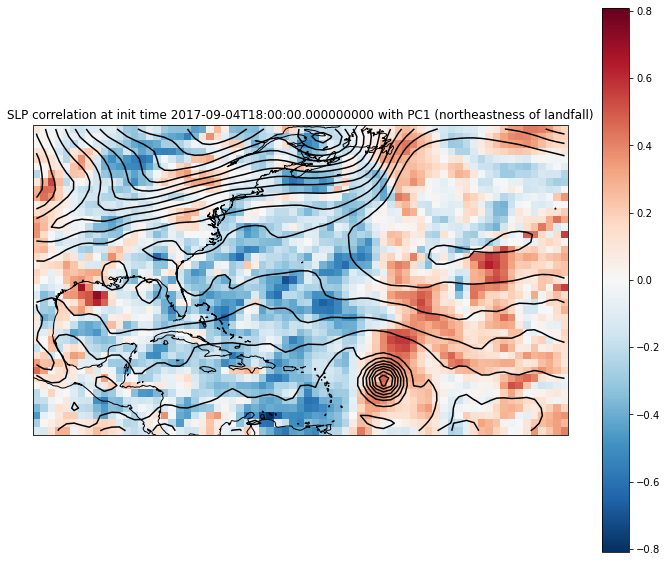

In [23]:
# Necessary for a map 
projection = ccrs.PlateCarree()
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,10])

# Show PCcor field
pccor[0].plot(ax=ax)

# Overplot ensemble mean SLP so we can interpret correlations 
MSLP = ds_der.Pressure_reduced_to_MSL_msl_unweightedMean.sel(lon=slice(360-100,360-30), lat=slice(50,10))
MSLP[0].plot.contour(colors='k',vmin=95000,vmax=102000,levels=35)
ax.coastlines();

ax.set_title('SLP correlation at init time '+str(pccor.time2[0].values)+\
             ' with PC1 (northeastness of landfall)');

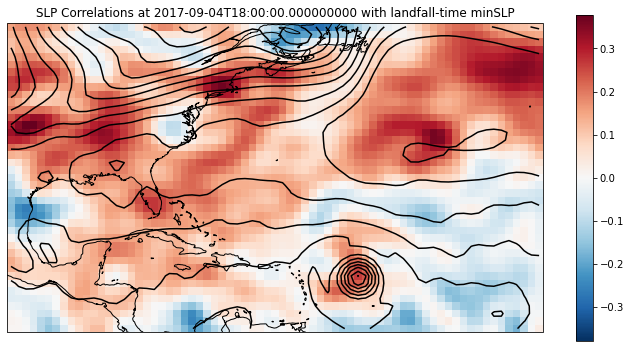

In [27]:
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,6])

# Show SLPcor field
SLPcor[0].plot(ax=ax, cmap='RdBu_r')

# Overplot ensemble mean SLP so we can interpret correlations 
MSLP = ds_der.Pressure_reduced_to_MSL_msl_unweightedMean.sel(lon=slice(360-100,360-30), lat=slice(50,10))
MSLP[0].plot.contour(colors='k',vmin=95000,vmax=102000,levels=30)
ax.coastlines();

ax.set_title('SLP Correlations at '+str(SLPcor.time2[0].values)+' with landfall-time minSLP');

In [28]:
# bigroi['v-component_of_wind_isobaric_ens'] # isobaric1 is the name of pressure levels for u,v
# TRACK:
# use the measure of NE-SW displacement: EOF1 Mode amplitude. Rename "time" to "ens" (Eofs package demanded it)
pccorZ = xr.corr(pc[:,0], bigroi['Geopotential_height_isobaric_ens'].sel(isobaric2=50000), dim="ens")
pccoru = xr.corr(pc[:,0], bigroi['u-component_of_wind_isobaric_ens'].sel(isobaric1=50000), dim="ens")
pccorv = xr.corr(pc[:,0], bigroi['v-component_of_wind_isobaric_ens'].sel(isobaric1=50000), dim="ens")

# STRENGTH: 
# use with strength measure: SLPmins. Have to make it a xarray DataArray with dimesnion called "ens" 
xSLPmins = xr.DataArray(SLPmins, dims="ens")
SLPcorZ =xr.corr(xSLPmins, bigroi['Geopotential_height_isobaric_ens'].sel(isobaric2=50000), dim="ens")

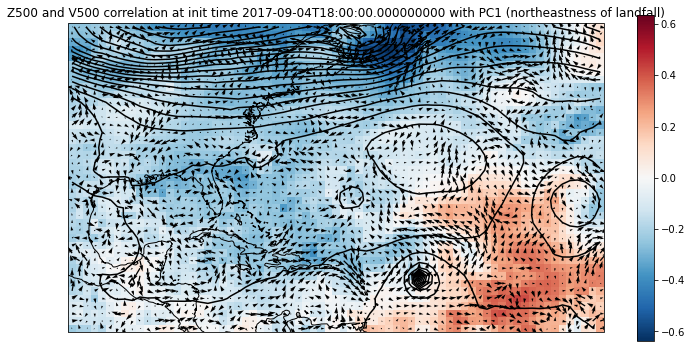

In [31]:
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,6])

pccorZ[0].plot(ax=ax)
plt.quiver(pccoru.lon, pccoru.lat, pccoru[0],pccorv[0])

# Overplot ensemble mean Z500 so we can interpret correlations 
Z500 = ds_der.Geopotential_height_isobaric_unweightedMean.sel(lon=slice(360-100,360-30), lat=slice(50,10), isobaric2=50000)
Z500[0].plot.contour(colors='k',levels=23)
ax.coastlines();

ax.set_title('Z500 and V500 correlation at init time '+str(pccor.time2[0].values)+\
             ' with PC1 (northeastness of landfall)');

In [32]:
# use Pascal units for SLPmins
SLPregZ = SLPcorZ * 100*np.std(SLPmins) / ds_der.Geopotential_height_isobaric_stdDev.sel(lon=slice(360-100,360-30), lat=slice(50,10), isobaric2=50000)

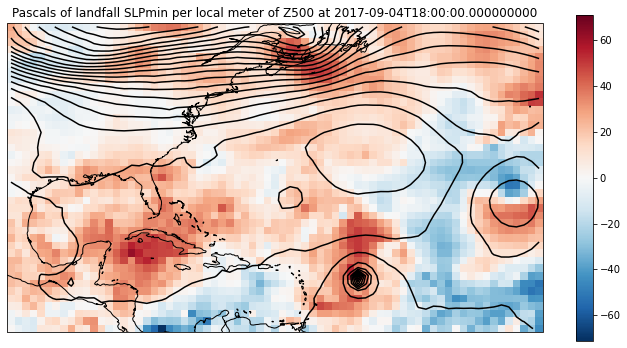

In [33]:
f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=[12,6])

SLPregZ[0].plot(ax=ax)

# Overplot ensemble mean SLP so we can interpret correlations 
Z500 = ds_der.Geopotential_height_isobaric_unweightedMean.sel(lon=slice(360-100,360-30), lat=slice(50,10), isobaric2=50000)
Z500[0].plot.contour(colors='k',levels=23)
ax.coastlines();

ax.set_title('Pascals of landfall SLPmin per local meter of Z500 at '+str(pccor.time2[0].values));

In [22]:
pccor

<xarray.DataArray (time2: 65, isobaric1: 12, lat: 41, lon: 71)>
array([[[[ 2.57549423e-01,  1.90421609e-01,  1.79953807e-01, ...,
          -7.84412143e-03,  3.62453230e-02,  7.45965804e-02],
         [ 1.44334435e-01,  1.31147421e-01,  1.51263166e-01, ...,
          -7.57752346e-02, -6.23859182e-02, -3.94790275e-02],
         [ 8.84277658e-02,  9.23799383e-02,  7.56505230e-02, ...,
          -1.45612496e-01, -1.31701923e-01, -1.77453495e-01],
         ...,
         [-1.91577415e-01, -1.54851075e-01, -8.15603572e-02, ...,
           1.89851243e-01,  1.96727699e-01,  1.51794817e-01],
         [-2.02584311e-01, -1.55672899e-01, -7.25495784e-02, ...,
           1.54794744e-01,  1.41302471e-01,  1.30938249e-01],
         [-2.16864784e-01, -1.43324293e-01, -1.12000991e-01, ...,
           1.45426333e-01,  1.44741893e-01,  1.51707521e-01]],

        [[ 1.69392943e-01,  2.20991209e-01,  4.26531253e-02, ...,
          -1.95834547e-01, -1.71909870e-01, -2.76806495e-01],
         [ 1.72602559e-01,  1.03257099e-01,  5.40106810e-02, ...,
          -1.95589921e-01, -2.37372655e-01, -2.50425089e-01],
         [-6.29401195e-02, -1.38658356e-01, -1.29017126e-01, ...,
          -2.57325566e-01, -2.91424237e-01, -3.21220610e-01],
...
         [ 2.29814552e-01,  2.91635240e-01,  3.27140267e-01, ...,
          -2.77482769e-01, -2.35042598e-01, -1.79333018e-01],
         [ 2.21121271e-01,  4.15258663e-01,  5.10661415e-01, ...,
          -2.30037704e-01, -2.06202009e-01, -1.62251694e-01],
         [ 3.45185680e-01,  5.62245723e-01,  6.07816092e-01, ...,
          -2.05182089e-01, -1.97385491e-01, -1.83351016e-01]],

        [[ 9.48426338e-02,  1.03870652e-01,  1.05846460e-01, ...,
           2.87555148e-01,  3.01511661e-01,  3.03557583e-01],
         [ 9.69838101e-02,  1.00586195e-01,  6.94518018e-02, ...,
           2.74548455e-01,  2.87104571e-01,  2.87750045e-01],
         [ 9.10135649e-03, -3.07265765e-02, -8.15286943e-02, ...,
           2.77640771e-01,  2.71863013e-01,  2.53555333e-01],
         ...,
         [ 1.45278004e-01,  2.75695263e-01,  3.44240396e-01, ...,
          -2.18641579e-01, -2.07113919e-01, -1.84954484e-01],
         [ 1.25347389e-01,  3.57256890e-01,  5.31453021e-01, ...,
          -2.30536605e-01, -2.01037632e-01, -2.12948098e-01],
         [ 1.97304138e-01,  4.63903911e-01,  5.70868874e-01, ...,
          -2.60916021e-01, -2.26830611e-01, -2.15237983e-01]]]])
Coordinates:
    mode       int32 0
  * lat        (lat) float32 50.0 49.0 48.0 47.0 46.0 ... 13.0 12.0 11.0 10.0
  * lon        (lon) float32 260.0 261.0 262.0 263.0 ... 327.0 328.0 329.0 330.0
    reftime    datetime64[ns] 2017-09-04T18:00:00
  * time2      (time2) datetime64[ns] 2017-09-04T18:00:00 ... 2017-09-20T18:0...
  * isobaric1  (isobaric1) float32 1e+03 5e+03 1e+04 ... 8.5e+04 9.25e+04 1e+05

In [23]:
pccor.sel(time='20170904')

KeyError: 'time is not a valid dimension or coordinate'